# Day 16-17: Urban/Rural - Land

I need to catch up...

This won't be the most artistic day, but I would find it useful in my life to have code that downloads GHSL datasets and plots them.

## Configuration

In [7]:
import os
import rioxarray
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## GHSL-POP
Population dataset from [Global Human Settlement Layer, GHSL](https://ghsl.jrc.ec.europa.eu/)

In [2]:
# Choose tile of interest
tile = "28_9"

# Arrange URL
url = ("zip+https://cidportal.jrc.ec.europa.eu/"\
       "ftp/jrc-opendata/GHSL/"\
       "GHS_POP_MT_GLOBE_R2019A/"\
       "GHS_POP_E2015_GLOBE_R2019A_54009_1K/"\
       "V1-0/tiles/"\
       f"GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0_{tile}.zip"\
      f"!GHS_POP_E2015_GLOBE_R2019A_54009_1K_V1_0_{tile}.tif")

# Read data
pop = rioxarray.open_rasterio(url, masked=True)

# Preview
pop

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
[1000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 -500.0 -1.5e+03 -2.5e+03 ... -9.985e+05 -9.995e+05
  * x            (x) float64 9.96e+06 9.960e+06 ... 1.096e+07 1.096e+07
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

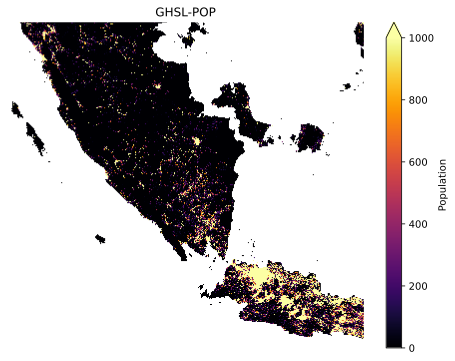

In [12]:
# Construct plot
fig, ax = plt.subplots(figsize=(8,6))
im = pop.squeeze().plot.imshow(
                                ax=ax,
                                vmin=0,
                                vmax=1000,
                                cmap='inferno',
                                cbar_kwargs={"label": "Population"}
                               )
ax.axis('off')
ax.set(title="GHSL-POP")

# Save
out_file = f"16-17_POP.png"
out_path = os.path.join("..", "contributions", out_file)
fig.savefig(out_path, dpi=300, facecolor="w", bbox_inches="tight")

# Preview
plt.show()

##  GHSL-SMOD
Settlement dataset from [Global Human Settlement Layer, GHSL](https://ghsl.jrc.ec.europa.eu/)

In [4]:
# Arrange URL
url = ("zip+https://cidportal.jrc.ec.europa.eu/"\
       "ftp/jrc-opendata/GHSL/"\
       "GHS_SMOD_POP_GLOBE_R2019A/"\
       "GHS_SMOD_POP2015_GLOBE_R2019A_54009_1K/"\
       "V2-0/tiles/"\
       f"GHS_SMOD_POP2015_GLOBE_R2019A_54009_1K_V2_0_{tile}.zip"\
      f"!GHS_SMOD_POP2015_GLOBE_R2019A_54009_1K_V2_0_{tile}.tif")

# Read data
smod = rioxarray.open_rasterio(url, masked=True)

# Preview
smod

<xarray.DataArray (band: 1, y: 1000, x: 1000)>
[1000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 -500.0 -1.5e+03 -2.5e+03 ... -9.985e+05 -9.995e+05
  * x            (x) float64 9.96e+06 9.960e+06 ... 1.096e+07 1.096e+07
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

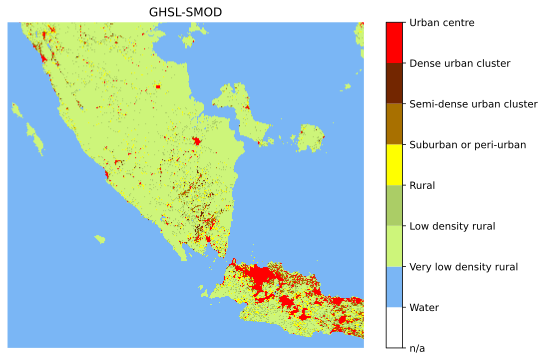

In [9]:
# Set colors
cmap_discrete = colors.ListedColormap(["#ffffff","#7ab6f5","#cdf57a","#abcd66","#375623","#ffff00","#a87000","#732600","#ff0000"])
cmap_labels = ["n/a","Water","Very low density rural","Low density rural","Rural","Suburban or peri-urban","Semi-dense urban cluster","Dense urban cluster","Urban centre"] 
cmap_vals = [-200,10,11,12,13,21,22,23,30.1]

# Construct map
fig, ax = plt.subplots(figsize=(8,6))
im = smod.squeeze().plot.imshow(ax=ax,
                                cmap=cmap_discrete,
                                levels=cmap_vals,
                                add_colorbar=False,
                               )
cbar = ax.figure.colorbar(im, ax=ax, ticks=cmap_vals)
cbar.set_ticklabels(cmap_labels)
ax.set(title="GHSL-SMOD")
ax.axis('off')

# Save
out_file = f"16-17_SMOD.png"
out_path = os.path.join("..", "contributions", out_file)
fig.savefig(out_path, dpi=300, facecolor="w", bbox_inches="tight")

# Preview
plt.show()